# Principal Component Analysis

Think of the predictors in your dataset as dimensions in what we can usefully call "feature space". If we're predicting house prices, then we might have a 'square feet' dimension or a 'number of bathrooms' dimension, etc. Then each record (of a house or a house sale, say) would be represented as a point (or vector) in this feature space. Some would score higher on the 'latitude' dimension or lower on the 'number of bedrooms' dimension, or whatever.

One difficulty is that, despite our working nomenclature, these things aren't really _dimensions_ in the truest sense, since they're not independent of each other. When we talk about the x-, y-, and z-dimensions of Euclidean 3-space, for example, one important feature is that values of x have no bearing (per se) on values of y or of z. I can move three units along the x-dimension without changing my y- or z-position.

But the analogous thing is generally not true for datasets. When I increase my position along the 'number of bedrooms' dimension--or, better, _direction_, I also tend to increase my position along, say, the 'square feet' direction as well.

This is problematic for a couple reasons: One is that my model could be in effect "double-counting" certain features of my signal, which can lead to overfit models. And if my goal is inference or explanation, then I'm going to have a very hard time distinguishing between the idea that the number of bedrooms is what's _really_ predictive of housing  prices and the idea that the number of square feet is what's really so predictive.

The idea behind PCA is to transform our dataset into something more useful for building models. What we want to do is to build new dimensions (predictors) out of the dimensions we are given in such a way that:

(1) each dimension we draw captures as much of the remaining variance among our predictors as possible; and <br/>
(2) each dimension we draw is orthogonal to the ones we've already drawn.

## Motivation

Think back to multiple linear regression for a moment.

The fundamental idea is that I can get a better prediction for my dependent variable by considering a *linear combination of my predictors* than I can get by considering any one predictor by itself.

$\rightarrow$ **PCA insight**: If the combinations of predictors work better than the predictors themselves, then let's just treat the combinations as our primary dimensions!

But one problem with having lots of predictors is that it raises the chance that some will be nearly *collinear*.

$\rightarrow$ **PCA insight**: Since we're reconstructing our dimensions anyway, let's make sure that the dimensions we construct are mutually orthogonal! <br/>
$\rightarrow$ **PCA insight**: Moreover, since we'll be capturing much of the variance among our predictors in the first few dimensions we construct, we'll be able in effect to *reduce  the dimensionality* of our problem. Thus PCA is a fundamental tool in *dimensionality reduction*.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
cars = pd.read_csv('cars.csv')

In [3]:
cars.head()

mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   year     brand
0  14.0           8          350  165       4209           12   1972       US.
1  31.9           4           89   71       1925           14   1980   Europe.
2  17.0           8          302  140       3449           11   1971       US.
3  15.0           8          400  150       3761           10   1971       US.
4  30.5           4           98   63       2051           17   1978       US.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cars.drop('mpg', axis=1),
                                                    cars['mpg'],
                                                   random_state=20)

In [12]:
X_train.dtypes

 cylinders       int64
 cubicinches    object
 hp              int64
 weightlbs      object
 time-to-60      int64
 year            int64
 brand          object
dtype: object

In [13]:
X_train[' cubicinches'].replace(' ', np.nan, inplace=True)
X_train[' cubicinches'] = X_train[' cubicinches'].map(float)
X_train[' cubicinches'].fillna(X_train[' cubicinches'].mean(skipna=True), inplace=True)

In [14]:
X_train[' weightlbs'].replace(' ', np.nan, inplace=True)
X_train[' weightlbs'] = X_train[' weightlbs'].map(float)
X_train[' weightlbs'].fillna(X_train[' weightlbs'].mean(), inplace=True)

In [15]:
X_train[' cylinders'] = X_train[' cylinders'].map(float)
X_train[' hp'] = X_train[' hp'].map(float)
X_train[' time-to-60'] = X_train[' time-to-60'].map(float)
X_train[' year'] = X_train[' year'].map(float)

In [16]:
# Scaling

ss = StandardScaler()

In [17]:
# Scale-transforming

X_tr_sc = ss.fit_transform(X_train.drop(' brand', axis=1))

In [18]:
# Let's construct a linear regression

lr = LinearRegression().fit(X_tr_sc, y_train)

# Score on train
lr.score(X_tr_sc, y_train)

0.8070791414437146

In [19]:
def clean(df):
    for col in [' cubicinches', ' weightlbs']:
        df[col].replace(' ', np.nan, inplace=True)
        df[col] = df[col].map(float)
        df[col].replace(np.nan, df[col].mean(), inplace=True)
    return df

In [20]:
def to_float(df):
    for col in [' cylinders', ' hp', ' time-to-60', ' year']:
        df[col] = df[col].map(float)
    return df

In [21]:
def drop(df):
    return df.drop(' brand', axis=1)

In [22]:
def scale(df):
    return ss.transform(df)

In [23]:
test_cleaned = clean(X_test)
test_floated = to_float(test_cleaned)
test_dropped = drop(test_floated)
test_scaled = scale(test_dropped)

In [24]:
# Score on test

lr.score(test_scaled, y_test)

0.7504046085411239

In [25]:
# Get the coefficients of the best-fit hyperplane

lr.coef_

array([-1.40889827,  0.68089322, -0.4802151 , -4.65755988, -0.17631133,
        2.42675657])

Thus, our best-fit hyperplane is given by:

$-1.409\times cyl + 0.681\times in^3 - 0.480\times hp - 4.658\times lbs. -  0.176\times time_{60} + 2.427\times yr$

## Eigenvalues and Eigenvectors

The key idea is to diagonalize (i.e. find the eigendecomposition of) the covariance matrix. The decomposition will produce a set of orthogonal vectors that explain as much of the remaining variance as possible. These are our [principal components](https://math.stackexchange.com/questions/23596/why-is-the-eigenvector-of-a-covariance-matrix-equal-to-a-principal-component).

Let's say a word about eigenvalues and eigenvectors. It turns out that eigenvalues and -vectors have a dizzying number of applications. But the basic idea is that, if we can split a bunch of vectors (i.e. a matrix) into a set of mutually orthogonal vectors, then we can isolate the force of the bunch into discrete bits, each of which by itself acts like a simple linear transformation.

That's why the definition of an eigenvector is as it is: $\vec{x}$ is an eigenvector of the matrix $A$ if $A\vec{x} = \lambda\vec{x}$, for some scalar $\lambda$. That is, the vector is oriented in just such a direction that multiplying the matrix by it serves only to lengthen or shorten it.

Suppose we have the matrix
$A =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix}
$.

Let's calculate the eigendecomposition of this matrix.

In order to do this, we set $(A - \lambda I)\vec{x} = 0$. One trivial solution is $\vec{x} = \vec{0}$, but if there are more interesting solutions, then it must be that $|A - \lambda I| = 0$, which is to say that some column vector in $A - \lambda I$ must be expressible as a linear combination of the other columns. (Otherwise, there would be no way to "undo" the multiplicative effect of a column vector on $\vec{x}$!) For more on this point, see [this page](http://www2.math.uconn.edu/~troby/math2210f16/LT/sec1_7.pdf).

So we have:

$\begin{vmatrix}
a_{11} - \lambda & a_{12} \\
a_{21} & a_{22} - \lambda
\end{vmatrix} = 0$

$(a_{11} - \lambda)(a_{22} - \lambda) - a_{12}a_{21} = 0$

$\lambda^2 - (a_{11} + a_{22})\lambda + a_{11}a_{22} - a_{12}a_{21}$

$\lambda = \frac{a_{11} + a_{22}\pm\sqrt{(a_{11} + a_{22})^2 + 4(a_{12}a_{21} - a_{11}a_{22})}}{2}$

Suppose e.g. we had

$A = \begin{bmatrix}
5 & 3 \\
3 & 5
\end{bmatrix}$.

We can use the equation we just derived to solve for the eigenvalues of this matrix. Then we can plug *those* into our eigenvector definition to solve for the eigenvectors:

So:

### Eigenvalues

$\lambda = \frac{5+5\pm\sqrt{(5+5)^2+4(3\times 3 - 5\times 5)}}{2} = 5\pm\frac{\sqrt{36}}{2} = 2, 8$.

### Eigenvectors

Now we can plug those in. If we plug in $\lambda = 8$, then we get:

$\begin{bmatrix}
5-8 & 3 \\
3 & 5-8
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
-3 & 3 \\
3 & -3
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix} = 0.$

So:

$-3x_1 + 3x_2 = 0$ (or $3x_1 - 3x_2 = 0$)

$x_1 = x_2$.

It is standard to scale eigenvectors to a magnitude of 1, and so we would write this eigenvector as
$\begin{bmatrix}
\sqrt\frac{1}{2} \\
\sqrt\frac{1}{2}
\end{bmatrix}$.

If we plug in $\lambda = 2$, we find a second eigenvector equal to
$\begin{bmatrix}
-\sqrt\frac{1}{2} \\
\sqrt\frac{1}{2}
\end{bmatrix}$. (I'll leave this as an exercise.)

### In Code

In [29]:
# We can use np.linalg.eig()

A = np.array([[5, 3], [3, 5]])
np.linalg.eig(A)

(array([8., 2.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [30]:
# np.linalg.eig(X) returns a double of NumPy arrays, the first containing
# the eigenvalues of X and the second containing the eigenvectors of X.

v, q = np.linalg.eig(A)

In [31]:
v

array([8., 2.])

In [32]:
# np.diag()

np.diag(v)

array([[8., 0.],
       [0., 2.]])

In [33]:
# Reconstruct A by multiplication

q.dot(np.diag(v)).dot(q.T)

array([[5., 3.],
       [3., 5.]])

## PCA by Hand

What follows is indebted to [Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda).

In [34]:
# We'll start by producing the covariance matrix for the columns of X_tr_sc.

cov_mat = np.cov(X_tr_sc, rowvar=False)
cov_mat.shape

(6, 6)

In [35]:
cov_mat

array([[ 1.00515464,  0.95054229,  0.84015601,  0.88862141, -0.58673216,
        -0.28635987],
       [ 0.95054229,  1.00515464,  0.90813035,  0.91789425, -0.62906645,
        -0.31919939],
       [ 0.84015601,  0.90813035,  1.00515464,  0.85205094, -0.74580856,
        -0.34779071],
       [ 0.88862141,  0.91789425,  0.85205094,  1.00515464, -0.47833935,
        -0.23373732],
       [-0.58673216, -0.62906645, -0.74580856, -0.47833935,  1.00515464,
         0.2754432 ],
       [-0.28635987, -0.31919939, -0.34779071, -0.23373732,  0.2754432 ,
         1.00515464]])

In [36]:
np.linalg.eig(cov_mat)

(array([4.28816227, 0.89326802, 0.59474284, 0.14320283, 0.0389576 ,
        0.07259426]),
 array([[ 0.45427234,  0.14291488,  0.2039139 ,  0.67962553,  0.50166371,
          0.13443869],
        [ 0.46982149,  0.10987243,  0.1531847 ,  0.16599544, -0.80977183,
          0.24585637],
        [ 0.46221272,  0.02287927, -0.12894018, -0.60385346,  0.29429993,
          0.56387846],
        [ 0.44017714,  0.21748418,  0.36105403, -0.3576337 ,  0.06598816,
         -0.70450579],
        [-0.35675253,  0.10200707,  0.86011499, -0.13379493,  0.03960383,
          0.32102158],
        [-0.19553907,  0.95355918, -0.2194771 , -0.01061653, -0.00823046,
          0.06433281]]))

In [39]:
# Let's assign the results of eig(cov_mat) to a double of variables.

eigvals, eigvecs = np.linalg.eig(cov_mat)

In [40]:
# The columns of "eigvecs" are the eigenvectors!

eigvecs

array([[ 0.45427234,  0.14291488,  0.2039139 ,  0.67962553,  0.50166371,
         0.13443869],
       [ 0.46982149,  0.10987243,  0.1531847 ,  0.16599544, -0.80977183,
         0.24585637],
       [ 0.46221272,  0.02287927, -0.12894018, -0.60385346,  0.29429993,
         0.56387846],
       [ 0.44017714,  0.21748418,  0.36105403, -0.3576337 ,  0.06598816,
        -0.70450579],
       [-0.35675253,  0.10200707,  0.86011499, -0.13379493,  0.03960383,
         0.32102158],
       [-0.19553907,  0.95355918, -0.2194771 , -0.01061653, -0.00823046,
         0.06433281]])

In [41]:
# The eigenvectors of the covariance matrix are our principal components.
# Let's look at the first three.

pcabh = np.vstack([row[:3].reshape(1, 3) for row in eigvecs])

Now, to transform our data points into the space defined by the principal components, we simply need to compute the dot-product of `X_tr_sc` with those principal components.

Why? Think about what this matrix product looks like:

We take a row of `X_tr_sc` and multiply it by a column of `pcabh`, pairwise. The row of `X_tr_sc` represents the values for the columns in the original space. The column of `pcabh` represents the weights we need on each of the original columns in order to transform a value into principal-component space. And so the product of these two matrices will be each row, transformed into principal-component space!

In [42]:
X_tr_sc[:5, :]

array([[-0.91365933, -0.73753232, -0.75054527, -0.54569168,  0.80251396,
         1.15654312],
       [-0.91365933, -0.95200373, -1.46992382, -1.25674865,  1.82755909,
        -0.74548261],
       [-0.91365933, -1.03592732, -0.72573911, -1.11862103, -0.22253116,
        -1.28891854],
       [ 1.44612305,  2.3862903 ,  2.9703783 ,  0.10771202, -1.93093971,
        -1.5606365 ],
       [ 1.44612305,  1.40718172,  0.98588573,  1.30401733, -0.90589458,
        -0.74548261]])

In [43]:
X_tr_sc.dot(pcabh)[:5, :]

array([[-1.86111953,  0.83723319,  0.03688431],
       [-2.60114684, -1.06656605,  1.13916515],
       [-1.39816584, -1.75604199, -0.56381605],
       [ 4.19245622, -1.124883  , -1.00198969],
       [ 2.81669662, -0.13582698,  0.23858659]])

In [46]:
# Naturally, sklearn has a shortcut for this!

pca = PCA(n_components=3)                       # Check out how `n_components` works

X_train_new = pca.fit_transform(X_tr_sc)

# original data points TRANSFORMED into principal component space
X_train_new

array([[-1.86111953e+00, -8.37233189e-01,  3.68843075e-02],
       [-2.60114684e+00,  1.06656605e+00,  1.13916515e+00],
       [-1.39816584e+00,  1.75604199e+00, -5.63816052e-01],
       [ 4.19245622e+00,  1.12488300e+00, -1.00198969e+00],
       [ 2.81669662e+00,  1.35826979e-01,  2.38586592e-01],
       [ 4.89719343e+00, -1.74448146e-01, -7.82255536e-02],
       [ 2.00126138e+00, -9.73339596e-01, -3.31002765e-01],
       [-4.42447601e-01, -7.24702749e-02,  1.62585952e+00],
       [ 3.41693544e+00,  1.68290884e-02,  1.65789879e-01],
       [-1.79077164e+00, -6.06732426e-01, -1.05199507e+00],
       [-3.40295289e+00, -1.45516748e+00,  1.83685328e+00],
       [ 2.81226048e+00, -6.81210439e-01,  9.63953475e-02],
       [ 2.27965735e+00, -5.60957079e-01,  1.50053817e-01],
       [-1.24293631e+00,  4.42746738e-01,  8.62240394e-02],
       [ 2.57198987e+00,  5.55772571e-02,  8.31873765e-01],
       [-1.87600420e+00,  9.84864056e-01, -4.77141203e-01],
       [-5.76666572e-01,  5.40254299e-01

In [47]:
# Let's check out the explained variance

pca.explained_variance_

array([4.28816227, 0.89326802, 0.59474284])

In [49]:
# The ratio is often more informative

# first principal component accounts for 71% of the variance in mph, 2nd explains about 
# 15%, 3rd explains 10%.  This totals for about 95% of the variance in the mph !

pca.explained_variance_ratio_

array([0.71102862, 0.14811453, 0.09861548])

In [50]:
# We can also check out the Principal Components themselves

pca.components_

array([[ 0.45427234,  0.46982149,  0.46221272,  0.44017714, -0.35675253,
        -0.19553907],
       [-0.14291488, -0.10987243, -0.02287927, -0.21748418, -0.10200707,
        -0.95355918],
       [ 0.2039139 ,  0.1531847 , -0.12894018,  0.36105403,  0.86011499,
        -0.2194771 ]])

In [51]:
# Recall the columns of cars

cars.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

The results of our PCA are as follows:

**PC1** = 0.454 * cylinders + 0.470 * cubicinches + 0.462 * hp + 0.440 * weightlbs - 0.357 * time-to-60 - 0.196 * year

**PC2** = -0.143 * cylinders - 0.110 * cubicinches - 0.023 * hp - 0.217 * weightlbs - 0.102 * time-to-60 - 0.954 * year

**PC3** = 0.204 * cylinders + 0.153 * cubicinches - 0.129 * hp + 0.361 * weightlbs + 0.860 * time-to-60 - 0.219 * year

It turns out that these loadings are encoded in the eigenvectors of $X^TX$. Notice that:

- the absolute values of the components of PC1 are the first components of the eigenvectors below, <br/>
- the absolute values of the components of PC2 are the second components of the eigenvectors below, <br/>
- etc. <br/>

We'll have more to say about this when we examine the singular value decomposition of matrices later on.

In [52]:
# diagonalization of x transpose times itself

np.linalg.eig(X_tr_sc.T.dot(X_tr_sc))

(array([831.90348119, 173.29399576, 115.38011118,  27.78134973,
          7.55777516,  14.08328699]),
 array([[ 0.45427234,  0.14291488,  0.2039139 ,  0.67962553,  0.50166371,
          0.13443869],
        [ 0.46982149,  0.10987243,  0.1531847 ,  0.16599544, -0.80977183,
          0.24585637],
        [ 0.46221272,  0.02287927, -0.12894018, -0.60385346,  0.29429993,
          0.56387846],
        [ 0.44017714,  0.21748418,  0.36105403, -0.3576337 ,  0.06598816,
         -0.70450579],
        [-0.35675253,  0.10200707,  0.86011499, -0.13379493,  0.03960383,
          0.32102158],
        [-0.19553907,  0.95355918, -0.2194771 , -0.01061653, -0.00823046,
          0.06433281]]))

## Normality

In [53]:
# These principal components should be normalized.
# If they are, then the sum of the squares of the
# loadings should be 1 (magnitude of 1). Let's check!

mag0 = 0
for i in range(6):
    mag0 += pca.components_[0][i]**2
mag0

1.0000000000000007

In [54]:
np.linalg.norm(pca.components_[0])

1.0000000000000002

In [55]:
np.linalg.norm(pca.components_[1])

1.0

In [56]:
np.linalg.norm(pca.components_[2])

1.0

## Orthogonality

In [57]:
# These principal components should also be
# mutually orthogonal. If they are, then the
# dot product of any two of them should be 0.
# Let's check!

dot_prod01 = 0
for i in range(6):
    dot_prod01 += pca.components_[0][i] * pca.components_[1][i]
dot_prod01

0.0

In [58]:
pca.components_[0].dot(pca.components_[1])

-1.3877787807814457e-17

In [59]:
pca.components_[0].dot(pca.components_[2])

5.551115123125783e-17

In [60]:
pca.components_[1].dot(pca.components_[2])

4.579669976578771e-16

In [61]:
#these principal components really are orthogonal 

## Visualizations

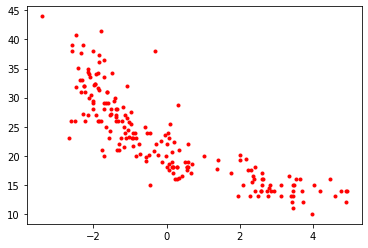

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(X_train_new[:, 0], y_train, 'r.');

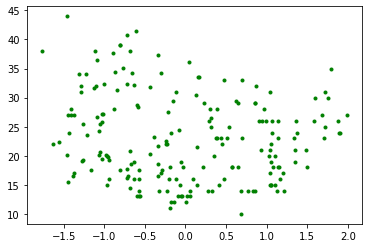

In [63]:
fig, ax = plt.subplots()
ax.plot(X_train_new[:, 1], y_train, 'g.');

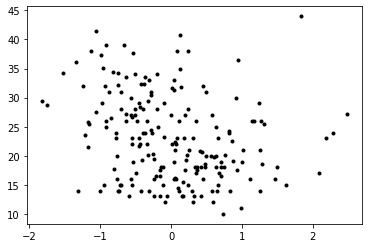

In [64]:
fig, ax = plt.subplots()
ax.plot(X_train_new[:, 2], y_train, 'k.');

Question: Is the first principal component the same line we would get if we constructed an ordinary least-squares regression line?

The answer is NO! Check out this post for an illuminating discussion: https://shankarmsy.github.io/posts/pca-vs-lr.html

## Modeling with New Dimensions

Now that we have optimized our features, we can build a new model with them!

In [72]:
lr_pca = LinearRegression()

# fit it to (pca) transformed data
lr_pca.fit(X_train_new, y_train)
# r squared is lower than original, but more 'honest'
lr_pca.score(X_train_new, y_train)

0.7892176900188986

In [73]:
# transform test data into pca space
X_test_new = pca.transform(test_scaled)

In [74]:
lr_pca.score(X_test_new, y_test)

0.7095548918693229

In [77]:
# these coefficients are the dimensions of our best fit plane
lr_pca.coef_

array([-3.00386437, -1.14559729, -2.48696878])

Thus, our best-fit hyperplane is given by:

$-3.00\times PC1 - 1.15\times PC2 -2.49\times PC3$

Of course, since the principal components are just linear combinations of our original predictors, we could re-express this hyperplane in terms of those original predictors!

And if the PCA was worth anything, we should expect the new linear model to be *different from* the first!

Recall that we had:

**PC1** = 0.454 * cylinders + 0.470 * cubicinches + 0.462 * hp + 0.440 * weightlbs - 0.357 * time-to-60 - 0.196 * year

**PC2** = -0.143 * cylinders - 0.110 * cubicinches - 0.023 * hp - 0.217 * weightlbs - 0.102 * time-to-60 - 0.954 * year

**PC3** = 0.204 * cylinders + 0.153 * cubicinches - 0.129 * hp + 0.361 * weightlbs + 0.860 * time-to-60 - 0.220 * year

Therefore, our new PCA-made hyperplane can be expressed as:

$-3.00\times(0.454\times cyl + 0.470\times in^3 + 0.462\times hp + 0.440\times lbs. - 0.357\times time_{60} - 0.196\times yr)$ <br/> $- 1.15\times(-0.143\times cyl - 0.110\times in^3 - 0.023\times hp - 0.217\times lbs. - 0.102\times time_{60} - 0.954\times yr)$ <br/> $- 2.49\times(0.204\times cyl + 0.153\times in^3 - 0.129\times hp + 0.361\times lbs. + 0.860\times time_{60} - 0.219\times yr)$ <br/><br/> $= - 1.706\times cyl - 1.664\times in^3 -1.038\times hp - 1.969\times lbs. - 0.953\times time_{60} + 2.230\times yr$

In [78]:
# ^^^ this is the new best fit hyper plane in terms of our pca predictors

Our first linear regression model had:

$-1.409\times cyl + 0.681\times in^3 - 0.480\times hp - 4.658\times lbs. -  0.176\times time_{60} + 2.427\times yr$,

which is clearly a different hyperplane.

[Here's](https://www.youtube.com/watch?v=_UVHneBUBW0) a helpful video introduction to PCA if you're itching for more!

## Plotting with Our New Dimensions

In [79]:
pca.components_

array([[ 0.45427234,  0.46982149,  0.46221272,  0.44017714, -0.35675253,
        -0.19553907],
       [-0.14291488, -0.10987243, -0.02287927, -0.21748418, -0.10200707,
        -0.95355918],
       [ 0.2039139 ,  0.1531847 , -0.12894018,  0.36105403,  0.86011499,
        -0.2194771 ]])

In [80]:
cars[' cubicinches'].replace(' ', np.nan, inplace=True)
cars[' cubicinches'] = cars[' cubicinches'].map(float)
cars[' cubicinches'].fillna(cars[' cubicinches'].mean(skipna=True), inplace=True)

In [81]:
cars[' weightlbs'].replace(' ', np.nan, inplace=True)
cars[' weightlbs'] = cars[' weightlbs'].map(float)
cars[' weightlbs'].fillna(cars[' weightlbs'].mean(), inplace=True)

In [82]:
cars['PC1'] = pca.components_[0][0] * cars[' cylinders'] +\
            pca.components_[0][1] * cars[' cubicinches'] +\
            pca.components_[0][2] * cars[' hp'] +\
            pca.components_[0][3] * cars[' weightlbs'] +\
            pca.components_[0][4] * cars[' time-to-60'] +\
            pca.components_[0][5] * cars[' year']

In [83]:
cars['PC2'] = pca.components_[1][0] * cars[' cylinders'] +\
            pca.components_[1][1] * cars[' cubicinches'] +\
            pca.components_[1][2] * cars[' hp'] +\
            pca.components_[1][3] * cars[' weightlbs'] +\
            pca.components_[1][4] * cars[' time-to-60'] +\
            pca.components_[1][5] * cars[' year']

In [84]:
#plt.scatter(cars['PC2'], cars['PC1']);

In [86]:
# This particular combination of base features using pc1 has a particularly high 
#correlation with mpg

cars.corr()['PC1']

mpg            -0.830682
 cylinders      0.911294
 cubicinches    0.945847
 hp             0.881140
 weightlbs      0.998077
 time-to-60    -0.512697
 year          -0.297066
PC1             1.000000
PC2            -0.998863
Name: PC1, dtype: float64